In [22]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import math
import descartes
from shapely.geometry import Point,Polygon
AgeDep = pd.read_csv('AgeDeathDep.csv')
Age=AgeDep['Age'].values
Fatality=AgeDep['Fatality'].values/2
# AgeDep


[1.87554676e-08 3.54963984e+00]
[0.0032838  0.00911725 0.02013073 0.03845249 0.06646016 0.10676083
 0.1621754 ]
[30 40 50 60 70 80 90]


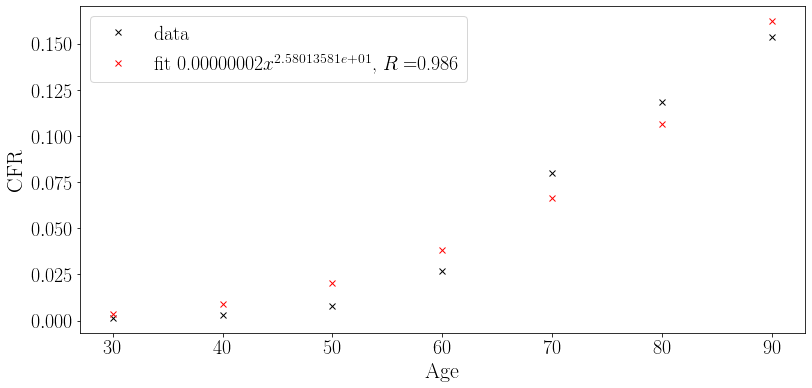

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import stats
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('text', usetex=True)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] =['DejaVu Sans'] #Font type
plt.figure(figsize=(13,6))#size of figure in inches

# plt.loglog((dens),(betaNp), 'kx')
plt.xlabel(r'Age')
plt.ylabel('CFR')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
# funvec=np.vectorize(fitfunc)
 # Initial guess for the parameters
# popt, pcov = curve_fit(func, densityOrdered, cases/PopOrdered,p0 = [0.002, 0.01,])
p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(Age, Fatality/100))
# temp=funvec(p1,densityOrdered)

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],Age),Fatality/100)
plt.plot((Age),(Fatality)/100, 'kx',label='data')
print(p1)
plt.plot( Age, fitfunc(p1, Age), "rx",label='fit  '+'{:01.8f}'.format(p1[0])+r'$x^{2.58013581e+01}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("CFR.jpg")
print(fitfunc(p1, Age))
print(Age)

In [8]:
work_age_groups = ['0-15', '16-24', '25-34', '35-49', '50-64', '65-74', '75+']
age=[7.5,20,30,42.5,57,70,80]

Using https://www.medrxiv.org/content/10.1101/2020.04.08.20056861v1.full.pdf

In [10]:
A=np.array([53, 70, 117, 261, 351, 130, 98])
P=np.array([68, 90, 200, 510, 636, 275, 390 ])
S=np.array([90, 160, 370,1300,2200, 1600,2000 ])
H=np.array([12, 25, 95,420,1300, 900,1200 ])
C=np.array([1,4,13,78, 280, 250, 211])
Im=np.array([1,1,6,52,500,1300,3700 ])
Im=Im/5541*300

In [11]:
alpha=(A+P)/(S+H+C+A+P)
alpha

array([0.54017857, 0.45845272, 0.39874214, 0.30011678, 0.20704846,
       0.12836767, 0.1251603 ])

[  0.65850154 -50.5052005 ]
[0.56762858 0.44317647 0.36356883 0.28385665 0.21301662 0.16467453
 0.1350941 ]


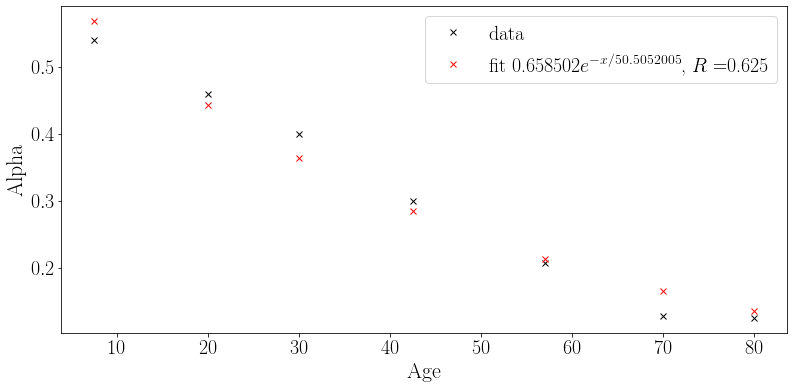

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import stats
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('text', usetex=True)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] =['DejaVu Sans'] #Font type
plt.figure(figsize=(13,6))#size of figure in inches

# plt.loglog((dens),(betaNp), 'kx')
plt.xlabel(r'Age')
plt.ylabel('Alpha')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(np.exp(1),x/p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
# funvec=np.vectorize(fitfunc)
 # Initial guess for the parameters
# popt, pcov = curve_fit(func, densityOrdered, cases/PopOrdered,p0 = [0.002, 0.01,])
p0 = [0.002, -3]
p1,success = optimize.leastsq(errfunc, p0[:], args=(age, alpha))
# temp=funvec(p1,densityOrdered)

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],age),alpha)
plt.plot((age),(alpha), 'kx',label='data')
print(p1)
plt.plot( age, fitfunc(p1, age), "rx",label='fit  '+'{:01.6f}'.format(p1[0])+r'$e^{-x/50.5052005}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("Alpha.jpg")
print(fitfunc(p1, age))

In [17]:
hh=(H)/S
hh=hh/1.7

[0.00902014 0.85039944]
[0.05004547 0.11524135 0.16268827 0.21877324 0.28080714 0.33441327
 0.37462764]


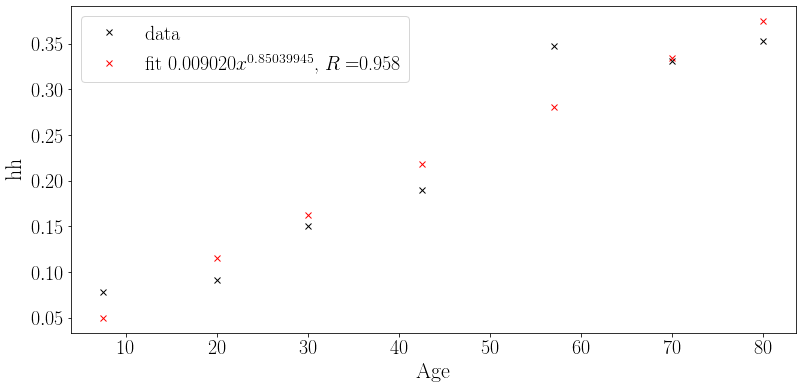

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import stats
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('text', usetex=True)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] =['DejaVu Sans'] #Font type
plt.figure(figsize=(13,6))#size of figure in inches

# plt.loglog((dens),(betaNp), 'kx')
plt.xlabel(r'Age')
plt.ylabel('hh')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
# funvec=np.vectorize(fitfunc)
 # Initial guess for the parameters
# popt, pcov = curve_fit(func, densityOrdered, cases/PopOrdered,p0 = [0.002, 0.01,])
p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(age, hh))
# temp=funvec(p1,densityOrdered)

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],age),hh)
plt.plot((age),(hh), 'kx',label='data')
print(p1)
plt.plot( age, fitfunc(p1, age), "rx",label='fit  '+'{:01.6f}'.format(p1[0])+r'$x^{0.85039945}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("hh.jpg")
print(fitfunc(p1, age))

I rescale cc to be closer to have the mean closer to the non age distributed lit value 

In [20]:
cc=(C+Im)/H
cc=cc*1.5

[0.02257974 0.71334969]
[0.09504815 0.19134113 0.25551887 0.32758932 0.40389807 0.46764803
 0.51438423]


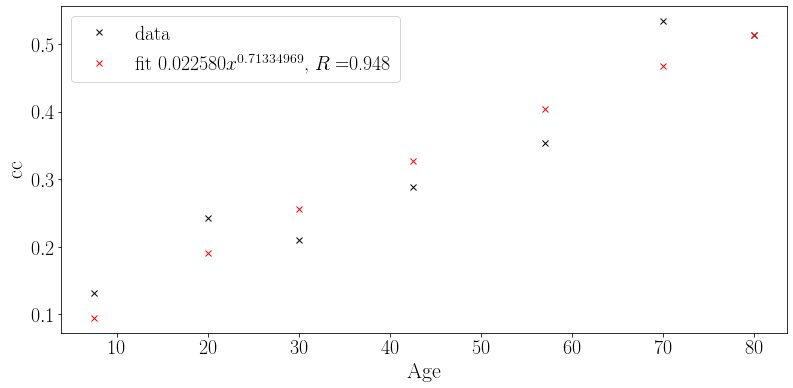

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import stats
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('text', usetex=True)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] =['DejaVu Sans'] #Font type
plt.figure(figsize=(13,6))#size of figure in inches

# plt.loglog((dens),(betaNp), 'kx')
plt.xlabel(r'Age')
plt.ylabel('cc')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
# funvec=np.vectorize(fitfunc)
 # Initial guess for the parameters
# popt, pcov = curve_fit(func, densityOrdered, cases/PopOrdered,p0 = [0.002, 0.01,])
p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(age, cc))
# temp=funvec(p1,densityOrdered)

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],age),cc)
plt.plot((age),(cc), 'kx',label='data')
print(p1)
plt.plot( age, fitfunc(p1, age), "rx",label='fit  '+'{:01.6f}'.format(p1[0])+r'$x^{0.71334969}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("cc.jpg")
print(fitfunc(p1, age))

In [13]:
mm=Im/C
mm

array([0.05414185, 0.01353546, 0.02498855, 0.03609457, 0.09668188,
       0.28153763, 0.94940688])

[5.94788113e-17 8.51304632e+00]


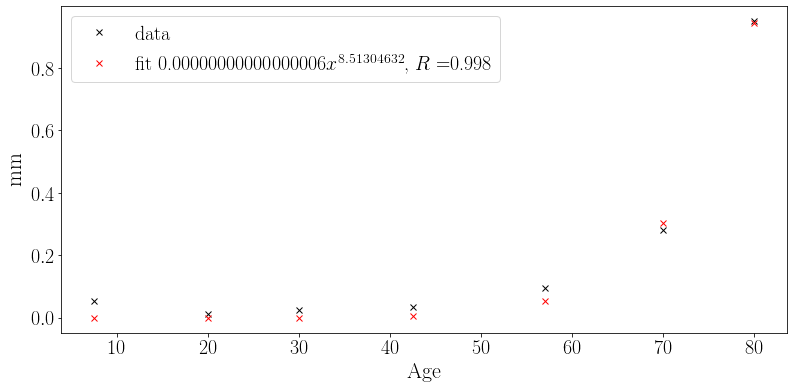

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import stats
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('text', usetex=True)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] =['DejaVu Sans'] #Font type
plt.figure(figsize=(13,6))#size of figure in inches

# plt.loglog((dens),(betaNp), 'kx')
plt.xlabel(r'Age')
plt.ylabel('mm')
r_value=0
def func(a,b,x):
    return a*np.power(x,b)
fitfunc = lambda p, x: p[0]*np.power(x,p[1])
errfunc = lambda p, x, y: fitfunc(p, x) - y
# funvec=np.vectorize(fitfunc)
 # Initial guess for the parameters
# popt, pcov = curve_fit(func, densityOrdered, cases/PopOrdered,p0 = [0.002, 0.01,])
p0 = [0.002, 0.01]
p1,success = optimize.leastsq(errfunc, p0[:], args=(age, mm))
# temp=funvec(p1,densityOrdered)

slope, intercept, r_value, p_value, std_err = stats.linregress(func(p1[0],p1[1],age),mm)
plt.plot((age),(mm), 'kx',label='data')
print(p1)
plt.plot( age, fitfunc(p1, age), "rx",label='fit  '+'{:01.17f}'.format(p1[0])+r'$x^{8.51304632}$, '+ '$R=$'+'{:01.3f}'.format(r_value) )
plt.legend()
plt.savefig("mm.jpg")
# print(fitfunc(p1, age))